In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import svm

In [ ]:
def ArbiterPUF(n_crp):
    n_stages = 128

    stage_delays = np.random.normal(size=n_stages+1) 

    x = [] 
    y = [] 

    for _ in range(n_crp): 
        challenge_vector = np.random.randint(2, size=n_stages) 
        #print(challenge_vector)
        feature_vector = [] 
        for i in range(n_stages): 
            feature = 1 
            for j in range(i, n_stages): 
                feature = feature * pow(-1, challenge_vector[j])
            feature_vector.append(feature) 
        feature_vector.append(1)
        #print(feature_vector)
        puf_result = np.dot(stage_delays, feature_vector) > 0 
        x.append(feature_vector) 
        y.append(puf_result)

    x_array = np.array(x) 
    y_array = np.array(y)    
    return x_array, y_array


In [17]:
def Nr_of_crp():

    x_array, y_array = ArbiterPUF(1000)
    X_train, X_test, Y_train, Y_test = train_test_split(x_array, y_array, test_size = 0.2, random_state = 42)

    crps_lr = []
    preds_lr = []
    crps_svm = []
    preds_svm = []
    for i in range(1, 200):
        crp = i*10
        x_array, y_array = ArbiterPUF(crp)
        X_train, X_test, Y_train, Y_test = train_test_split(x_array, y_array, test_size = 0.2, random_state = 42)
        lr = LogisticRegression(solver="lbfgs").fit(X_train, Y_train)
        crps_lr.append(crp)
        preds_lr.append(lr.score(X_test, Y_test))
        svm = SVC().fit(X_train, Y_train)
        crps_svm.append(crp)
        preds_svm.append(svm.score(X_test, Y_test))


    plt.plot(crps_lr, preds_lr, label = "LogReg")
    plt.plot(crps_svm, preds_svm, label = "SVM")
    plt.xlabel('Challenge response pairs')
    plt.ylabel('Accuracy')
    plt.title('CRP vs Performance')
    plt.legend()
    plt.show
    return

In [18]:
import functools
from sklearn import svm
import random

def XORPUF(n_PUF, n_crp, n_stages = 64):
    stage_delays = [np.random.normal(size=n_stages+1) for _ in range(n_PUF)]

    x = [] 
    y = [] 
    for _ in range(n_crp):
        feature_vectors = []
        results = []
        challenge_vector = np.random.randint(2, size=n_stages)
        for k in range(n_PUF): 
            #print(challenge_vector)
            feature_vector = [] 
            for i in range(n_stages): 
                feature = 1 
                for j in range(i, n_stages): 
                    feature = feature * pow(-1, challenge_vector[j])
                feature_vector.append(feature) 
            feature_vector.append(1)
            results.append(np.dot(stage_delays[k], feature_vector) > 0)
            feature_vectors.append(feature_vector)
        
        flat = []
        for sublist in feature_vectors:
            for element in sublist:
                flat.append(element)
        x.append(flat)
        y.append(functools.reduce(lambda x, y: x ^ y, results))

    x_array = np.array(x) 
    y_array = np.array(y)    
    return x_array, y_array

In [15]:
def Nr_of_crp_XOR():
    crps = []
    preds_lr = []
    preds_svm = []
    x_array, y_array = XORPUF(2, 20000)
    for i in range(2, 50):
        crp = i*400
        print(i)
        c = list(zip(x_array, y_array))
        random.shuffle(c)
        c = c[0:crp]
        x_subset, y_subset = zip(*c)
        X_train, X_test, Y_train, Y_test = train_test_split(x_subset, y_subset, test_size = 0.2, random_state = 42)
        lr = LogisticRegression(solver="lbfgs").fit(X_train, Y_train)
        crps.append(crp)
        preds_lr.append(lr.score(X_test, Y_test))
        svc = svm.SVC().fit(X_train, Y_train)
        preds_svm.append(svc.score(X_test, Y_test))

    print(preds_svm)
    plt.plot(crps, preds_lr, label = "LogReg")
    plt.plot(crps, preds_svm, label = "SVM")
    plt.xlabel('Challenge response pairs')
    plt.ylabel('Accuracy')
    plt.title('CRP vs Accuracy')
    plt.legend()
    plt.show
    return

Nr_of_crp_XOR()

KeyboardInterrupt: 

1
2
4
6
8
16
32


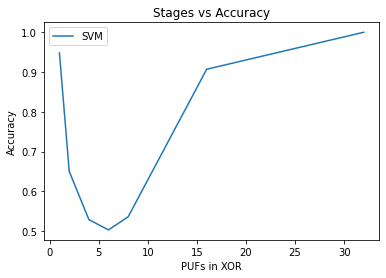

In [19]:
def Nr_of_stages_XOR():
    stages = []
    preds_lr = []
    preds_svm = []
    for i in [1,2, 4, 6, 8, 16, 32]:
        print(i)
        x_array, y_array = XORPUF(i, 5000, int(128/i))
        X_train, X_test, Y_train, Y_test = train_test_split(x_array, y_array, test_size = 0.2, random_state = 42)
        stages.append(i)
        svc = svm.SVC().fit(X_train, Y_train)
        preds_svm.append(svc.score(X_test, Y_test))
    plt.plot(stages, preds_svm, label = "SVM")
    plt.xlabel('PUFs in XOR')
    plt.ylabel('Accuracy')
    plt.title('Stages vs Accuracy')
    plt.legend()
    plt.show
    return

Nr_of_stages_XOR()

In [ ]:
def Best_PUF():
    x_array, y_array = XORPUF(4, 80000, 32)
    X_train, X_test, Y_train, Y_test = train_test_split(x_array, y_array, test_size = 0.2, random_state = 42)
    svc = svm.SVC().fit(X_train, Y_train)
    print(svc.score(X_test, Y_test))
    return
Best_PUF()